In [1]:
## Train a decision tree to predict one of the numerical columns of your own dataset.
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

imdb = pd.read_csv('imdb_top_1000.csv', sep=",").dropna()
imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [2]:
## Split your dataset into a train (70%) and test (30%) set.
imdb = imdb.groupby('Certificate').filter(lambda x : len(x)>1)

imdb_train, imdb_test = train_test_split(imdb, test_size=0.3, random_state=42, stratify=imdb['Certificate'])
print(imdb_train.shape, imdb_test.shape)

(497, 16) (214, 16)


In [3]:
## Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature 
## variables and you are also free to choose the max_depth of the tree.
features= ['IMDB_Rating', 'Meta_score']
dt_regression = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt_regression.fit(imdb_train[features], imdb_train['No_of_Votes'])

DecisionTreeRegressor(max_depth=3)

In [4]:
## Use your decision tree model to make predictions for both the train and test set.
## Train set predictions
predictions = dt_regression.predict(imdb_train[features])
predictions

array([ 331747.10344828,  331747.10344828,  232155.84912281,
        232155.84912281, 1165754.33333333,  232155.84912281,
        232155.84912281,  828348.38095238,  232155.84912281,
        232155.84912281,  232155.84912281,  232155.84912281,
        232155.84912281,  232155.84912281,  494079.6       ,
        232155.84912281,  331747.10344828,  331747.10344828,
        232155.84912281,  232155.84912281,  232155.84912281,
        232155.84912281,  232155.84912281,  331747.10344828,
        232155.84912281,  331747.10344828,  331747.10344828,
        232155.84912281,  494079.6       ,  331747.10344828,
       1165754.33333333,  828348.38095238,  494079.6       ,
        232155.84912281,  232155.84912281,  331747.10344828,
        232155.84912281,  331747.10344828,  232155.84912281,
        232155.84912281,  232155.84912281,  232155.84912281,
       1685419.90909091,  331747.10344828,  232155.84912281,
        232155.84912281,  331747.10344828,  232155.84912281,
        232155.84912281,

In [5]:
## Test set predictions
predictions = dt_regression.predict(imdb_test[features])
predictions

array([ 494079.6       ,  494079.6       ,  232155.84912281,
        331747.10344828,  232155.84912281,  232155.84912281,
        331747.10344828,  232155.84912281,  331747.10344828,
        232155.84912281,  232155.84912281,  494079.6       ,
        232155.84912281,  232155.84912281,  232155.84912281,
        232155.84912281,  331747.10344828,  331747.10344828,
        232155.84912281,  232155.84912281,  331747.10344828,
        232155.84912281,  331747.10344828,  232155.84912281,
        232155.84912281,  828348.38095238,  828348.38095238,
        232155.84912281,  232155.84912281, 1165754.33333333,
        232155.84912281,  232155.84912281,  232155.84912281,
        232155.84912281,  232155.84912281,  232155.84912281,
        331747.10344828,  331747.10344828,  232155.84912281,
        232155.84912281,  331747.10344828,  494079.6       ,
        331747.10344828,  331747.10344828,  232155.84912281,
        331747.10344828,  494079.6       ,  232155.84912281,
        232155.84912281,

In [6]:
## Calculate the RMSE for both the train set predictions and test set predictions.
predictionsOnTrainset = dt_regression.predict(imdb_train[features])
predictionsOnTestset = dt_regression.predict(imdb_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, imdb_train.No_of_Votes)
rmseTest = calculate_rmse(predictionsOnTestset, imdb_test.No_of_Votes)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

## Is the RMSE different? Did you expect this difference?
## The RMSE is different, I did expect this because the train set has more values then the test set and because the train
## set is trained and fitted with a descision tree regressor. So the trained set knows how to distribute values 
## between categories.

RMSE on training set 242430.9686791429
RMSE on test set 274024.14812432794


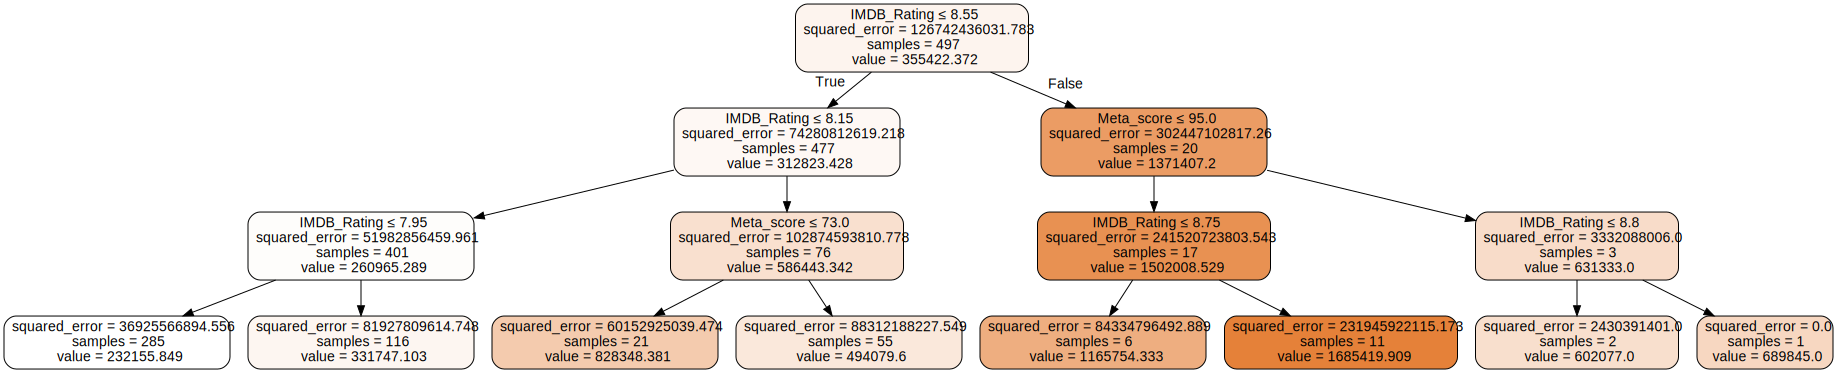

In [7]:
## Use the plot_tree function above to create a plot of the decision tree.
plot_tree_regression(dt_regression, features)

## Take a few minutes to analyse the decision tree.
## Do you understand the tree?
## I do understand the tree. The tree was created by using a dataset and splitting it's values based on one specific feature.
## Once this tree has been created by analysing this dataset predictions can be made to predict new partially unknown data.